In [1]:
import json
import torch
from hmc import hmc
from mh_within_gibbs import gibbs_sampling
from likelihood_weighting import likelihood_weighting
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
f = open('graphs/1.json', 'rb')
g1 = json.load(f)
f.close()
f = open('graphs/2.json', 'rb')
g2 = json.load(f)
f.close()
f = open('graphs/3.json', 'rb')
g3 = json.load(f)
f.close()
f = open('graphs/4.json', 'rb')
g4 = json.load(f)
f.close()

In [3]:
f = open('asts/1.json', 'rb')
ast1 = json.load(f)
f.close()
#print(ast1)
#print('\n\n')

f = open('asts/2.json', 'rb')
ast2 = json.load(f)
f.close()
#print(ast2)
#print('\n\n')

f = open('asts/3.json', 'rb')
ast3 = json.load(f)
f.close()
#print(ast3)
#print('\n\n')

f = open('asts/4.json', 'rb')
ast4 = json.load(f)
f.close()
#print(ast4)
#print('\n\n')

f = open('asts/5.json', 'rb')
ast5 = json.load(f)
f.close()
#print(ast5)
#print('\n\n')

# Program 1

## Importance Sampling

In [11]:
start = time.time()
result = likelihood_weighting(ast1, 100000) 
end = time.time()

In [12]:
print(end-start)

19.533912897109985


In [16]:
returns = torch.stack(result['returns']).float()
log_weights = torch.stack(result['log_weights'])
M = torch.max(log_weights)
normalized_weights = torch.exp(log_weights - M)/torch.sum(torch.exp(log_weights - M))
weighted_returns = normalized_weights*returns
expectation = torch.sum(weighted_returns)
returns_squared = returns*returns
variance = torch.sum(normalized_weights*returns_squared) - expectation*expectation
print("Expectation: {}".format(expectation.item()))
print("Variance: {}".format(variance.item()))

Expectation: 7.236835956573486
Variance: 0.8446235656738281


Text(0, 0.5, 'frequency')

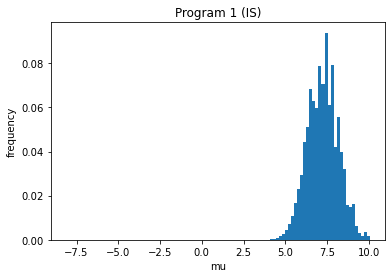

In [44]:
plt.hist(returns.numpy(), weights=normalized_weights.numpy(), bins=100)
plt.title("Program 1 (IS)")
plt.xlabel("mu")
plt.ylabel("frequency")

## MH Gibbs

In [37]:
start = time.time()
ret_vals, jlls = gibbs_sampling(g1, 100000)
end = time.time()

In [38]:
print(end-start)

94.85253596305847


In [39]:
ret_vals = torch.stack(ret_vals)
expectation = torch.mean(ret_vals)
variance = torch.std(ret_vals)**2
print('Expectation: {}'.format(expectation.item()))
print('Variance: {}'.format(variance.item()))

Expectation: 7.240914344787598
Variance: 0.8320391178131104


Text(0, 0.5, 'frequency')

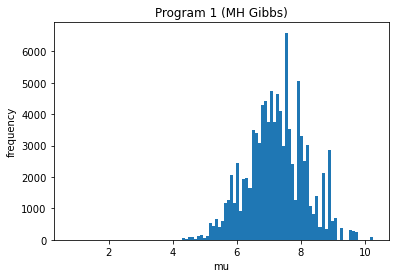

In [47]:
plt.hist(ret_vals.numpy(), bins=100)
plt.title("Program 1 (MH Gibbs)")
plt.xlabel("mu")
plt.ylabel("frequency")

Text(0, 0.5, 'mu')

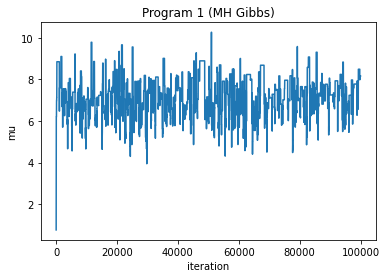

In [48]:
plt.plot(ret_vals.numpy())
plt.title("Program 1 (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("mu")

Text(0, 0.5, 'JLL')

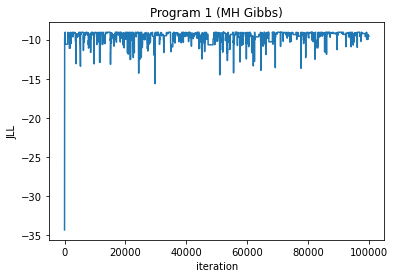

In [49]:
jlls = torch.stack(jlls)
plt.plot(jlls.numpy())
plt.title("Program 1 (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("JLL")

## HMC

In [58]:
start = time.time()
ret_vals, jlls = hmc(g1, 10000)
end = time.time()

In [59]:
print(end-start)

128.04001998901367


In [60]:
ret_vals = torch.stack(ret_vals)
expectation = torch.mean(ret_vals)
variance = torch.std(ret_vals)**2
print('Expectation: {}'.format(expectation.item()))
print('Variance: {}'.format(variance.item()))

Expectation: 7.2495436668396
Variance: 0.8493431210517883


Text(0, 0.5, 'frequency')

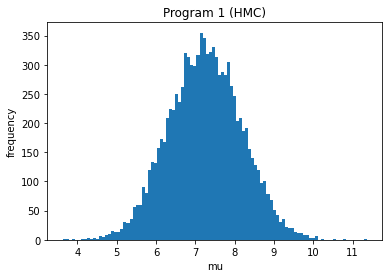

In [62]:
plt.hist(ret_vals.detach().numpy(), bins=100)
plt.title("Program 1 (HMC)")
plt.xlabel("mu")
plt.ylabel("frequency")

Text(0, 0.5, 'mu')

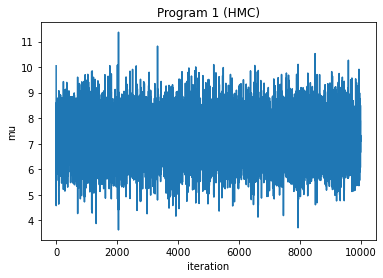

In [63]:
plt.plot(ret_vals.detach().numpy())
plt.title("Program 1 (HMC)")
plt.xlabel("iteration")
plt.ylabel("mu")

Text(0, 0.5, 'JLL')

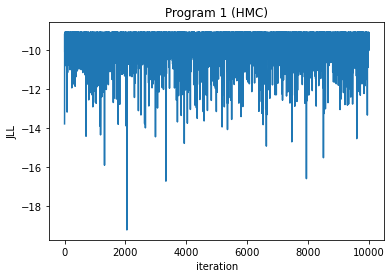

In [64]:
jlls = torch.stack(jlls)
plt.plot(jlls.detach().numpy())
plt.title("Program 1 (HMC)")
plt.xlabel("iteration")
plt.ylabel("JLL")

# Program 2

## Importance Sampling

In [68]:
start = time.time()
result = likelihood_weighting(ast2, 100000) 
end = time.time()

In [69]:
print(end-start)

85.87313389778137


In [75]:
returns = torch.stack(result['returns']).float()
log_weights = torch.stack(result['log_weights'])
M = torch.max(log_weights)
normalized_weights = torch.exp(log_weights - M)/torch.sum(torch.exp(log_weights - M))
weighted_returns = normalized_weights.unsqueeze(dim=1)*returns
expectation = torch.sum(weighted_returns, dim=0)
var00 = torch.sum(normalized_weights*returns[:,0]**2) - expectation[0]**2
var11 = torch.sum(normalized_weights*returns[:,1]**2) - expectation[1]**2
var01 = torch.sum(normalized_weights*returns[:,0]*returns[:,1]) - expectation[0]*expectation[1]
variance = torch.tensor([[var00, var01],[var01, var11]])
print("Expectation: {}".format(expectation.numpy()))
print("Covariance: ")
print(variance.numpy())

Expectation: [ 2.160934  -0.5681389]
Covariance: 
[[ 0.056458   -0.19934416]
 [-0.19934416  0.882903  ]]


Text(0, 0.5, 'frequency')

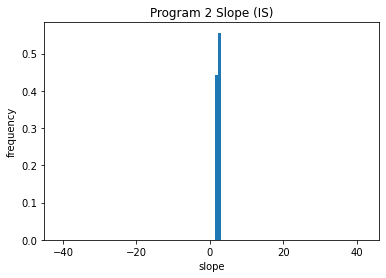

In [76]:
plt.hist(returns[:,0].numpy(), weights=normalized_weights.numpy(), bins=100)
plt.title("Program 2 Slope (IS)")
plt.xlabel("slope")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

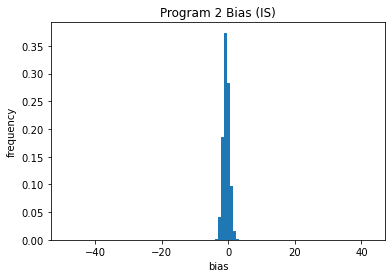

In [77]:
plt.hist(returns[:,1].numpy(), weights=normalized_weights.numpy(), bins=100)
plt.title("Program 2 Bias (IS)")
plt.xlabel("bias")
plt.ylabel("frequency")

# MH Gibbs

In [78]:
start = time.time()
ret_vals, jlls = gibbs_sampling(g2, 100000)
end = time.time()

In [79]:
print(end-start)

332.5917670726776


In [80]:
ret_vals = torch.stack(ret_vals).float()
jlls = torch.stack(jlls)
mean = torch.mean(ret_vals, dim=0).numpy()
slope = ret_vals[:,0].numpy()
bias = ret_vals[:,1].numpy()
print("Expectation: {}".format(mean))
print("Covariance: ")
print(np.cov(slope, bias))

Expectation: [ 2.1600854  -0.55851775]
Covariance: 
[[ 0.05755767 -0.19963064]
 [-0.19963064  0.8605278 ]]


Text(0, 0.5, 'frequency')

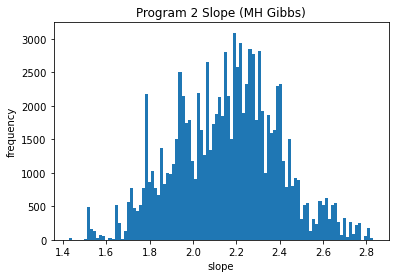

In [81]:
plt.hist(ret_vals[:,0].numpy(), bins=100)
plt.title("Program 2 Slope (MH Gibbs)")
plt.xlabel("slope")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

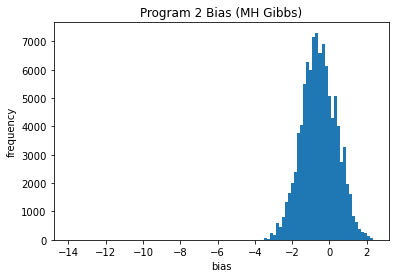

In [82]:
plt.hist(ret_vals[:,1].numpy(), bins=100)
plt.title("Program 2 Bias (MH Gibbs)")
plt.xlabel("bias")
plt.ylabel("frequency")

Text(0, 0.5, 'slope')

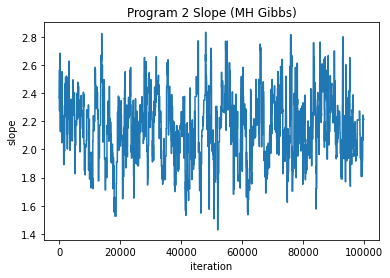

In [83]:
plt.plot(ret_vals[:,0].numpy())
plt.title("Program 2 Slope (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("slope")

Text(0, 0.5, 'bias')

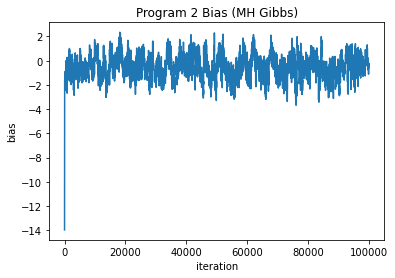

In [84]:
plt.plot(ret_vals[:,1].numpy())
plt.title("Program 2 Bias (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("bias")

Text(0, 0.5, 'JLL')

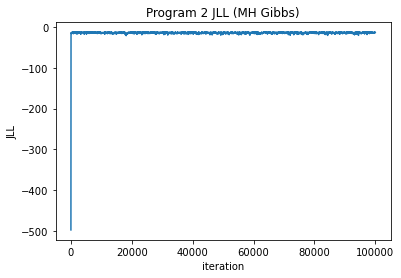

In [85]:
plt.plot(jlls.numpy())
plt.title("Program 2 JLL (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("JLL")

## HMC

In [86]:
start = time.time()
ret_vals, jlls = hmc(g2, 10000)
end = time.time()

In [87]:
print(end-start)

328.93455505371094


In [91]:
#ret_vals = torch.stack(ret_vals).float()
#jlls = torch.stack(jlls)
mean = torch.mean(ret_vals, dim=0).detach().numpy()
slope = ret_vals[:,0].detach().numpy()
bias = ret_vals[:,1].detach().numpy()
print("Expectation: {}".format(mean))
print("Covariance: ")
print(np.cov(slope, bias))

Expectation: [ 2.147279   -0.49165174]
Covariance: 
[[ 0.05762292 -0.20308677]
 [-0.20308677  0.88447278]]


Text(0, 0.5, 'frequency')

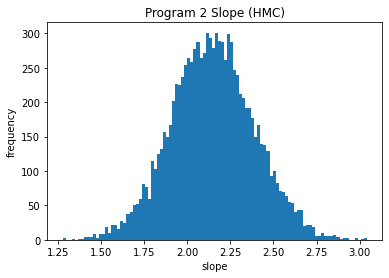

In [92]:
plt.hist(ret_vals[:,0].detach().numpy(), bins=100)
plt.title("Program 2 Slope (HMC)")
plt.xlabel("slope")
plt.ylabel("frequency")

Text(0, 0.5, 'frequency')

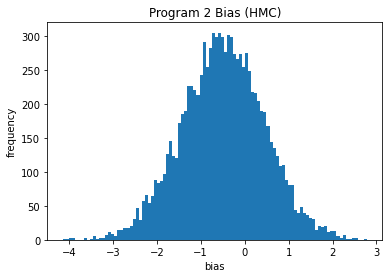

In [93]:
plt.hist(ret_vals[:,1].detach().numpy(), bins=100)
plt.title("Program 2 Bias (HMC)")
plt.xlabel("bias")
plt.ylabel("frequency")

Text(0, 0.5, 'slope')

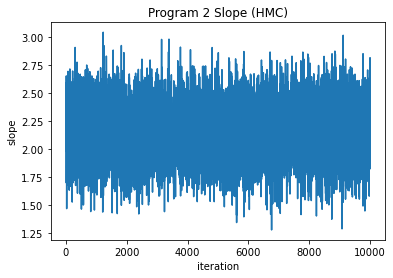

In [94]:
plt.plot(ret_vals[:,0].detach().numpy())
plt.title("Program 2 Slope (HMC)")
plt.xlabel("iteration")
plt.ylabel("slope")

Text(0, 0.5, 'bias')

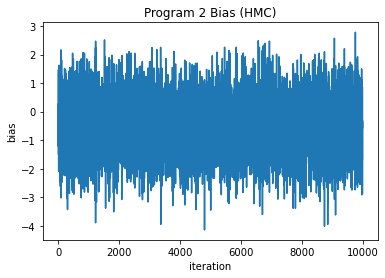

In [95]:
plt.plot(ret_vals[:,1].detach().numpy())
plt.title("Program 2 Bias (HMC)")
plt.xlabel("iteration")
plt.ylabel("bias")

Text(0, 0.5, 'JLL')

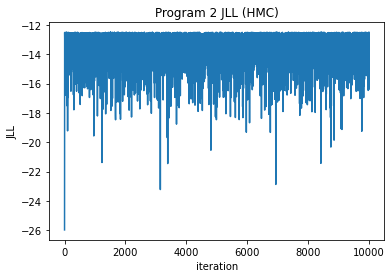

In [96]:
plt.plot(jlls.detach().numpy())
plt.title("Program 2 JLL (HMC)")
plt.xlabel("iteration")
plt.ylabel("JLL")

# Program 3

## Importance Sampling

In [99]:
start = time.time()
result = likelihood_weighting(ast3, 100000)
end = time.time()

In [100]:
print(end-start)

129.87191200256348


In [101]:
returns = torch.stack(result['returns']).float()
log_weights = torch.stack(result['log_weights'])
M = torch.max(log_weights)
normalized_weights = torch.exp(log_weights - M)/torch.sum(torch.exp(log_weights - M))
weighted_returns = normalized_weights*returns
expectation = torch.sum(weighted_returns)
returns_squared = returns*returns
variance = torch.sum(normalized_weights*returns_squared) - expectation*expectation
print("Expectation: {}".format(expectation.item()))
print("Variance: {}".format(variance.item()))

Expectation: 0.7982370853424072
Variance: 0.1610546112060547


Text(0, 0.5, 'frequency')

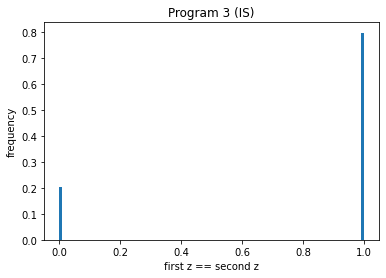

In [102]:
plt.hist(returns.numpy(), weights=normalized_weights.numpy(), bins=100)
plt.title("Program 3 (IS)")
plt.xlabel("first z == second z")
plt.ylabel("frequency")

## MH Gibbs

In [104]:
start = time.time()
ret_vals, jlls = gibbs_sampling(g3, 25000)
end = time.time()

In [105]:
print(end-start)

482.98594212532043


In [106]:
ret_vals = torch.stack(ret_vals).float()
mean = torch.mean(ret_vals)
var = torch.std(ret_vals)**2
jlls = torch.stack(jlls)
print("Expectation {}".format(mean.item()))
print("Variance {}".format(var.item()))

Expectation 0.6868399977684021
Variance 0.21509942412376404


Text(0, 0.5, 'frequency')

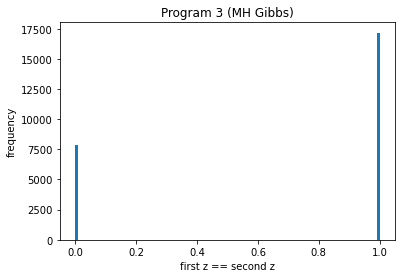

In [108]:
plt.hist(ret_vals.numpy(), bins=100)
plt.title("Program 3 (MH Gibbs)")
plt.xlabel("first z == second z")
plt.ylabel("frequency")

Text(0, 0.5, 'JLL')

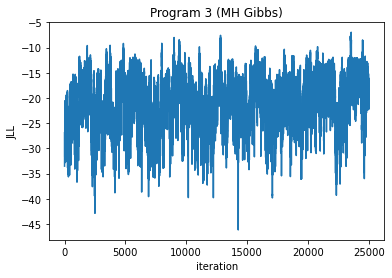

In [109]:
plt.plot(jlls)
plt.title("Program 3 (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("JLL")

# Program 4

## Importance Sampling

In [110]:
start = time.time()
result = likelihood_weighting(ast4, 100000)
end = time.time()

In [111]:
print(end-start)

34.26541709899902


In [112]:
returns = torch.stack(result['returns']).float()
log_weights = torch.stack(result['log_weights'])
M = torch.max(log_weights)
normalized_weights = torch.exp(log_weights - M)/torch.sum(torch.exp(log_weights - M))
weighted_returns = normalized_weights*returns
expectation = torch.sum(weighted_returns)
returns_squared = returns*returns
variance = torch.sum(normalized_weights*returns_squared) - expectation*expectation
print("Expectation: {}".format(expectation.item()))
print("Variance: {}".format(variance.item()))

Expectation: 0.3207576870918274
Variance: 0.21787220239639282


Text(0, 0.5, 'frequency')

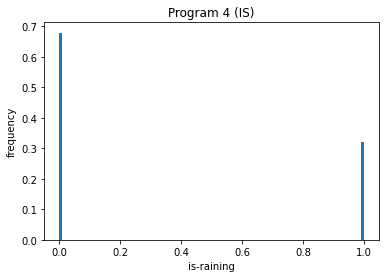

In [113]:
plt.hist(returns.numpy(), weights=normalized_weights.numpy(), bins=100)
plt.title("Program 4 (IS)")
plt.xlabel("is-raining")
plt.ylabel("frequency")

## MH Gibbs

In [4]:
start = time.time()
ret_vals, jlls = gibbs_sampling(g4, 100000)
end = time.time()

In [5]:
print(end-start)

264.28706216812134


In [6]:
ret_vals = torch.stack(ret_vals)
mean = torch.mean(ret_vals)
var = torch.std(ret_vals)**2
jlls = torch.stack(jlls).numpy()
print("Expectation: {}".format(mean.item()))
print("Variance: {}".format(var.item()))

Expectation: 0.3191699981689453
Variance: 0.21730266511440277


Text(0, 0.5, 'frequency')

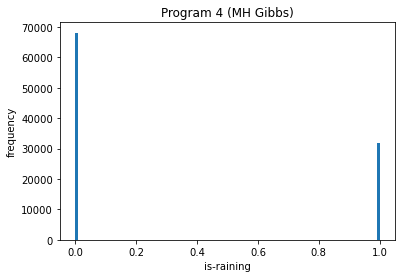

In [7]:
plt.hist(ret_vals.numpy(), bins=100)
plt.title("Program 4 (MH Gibbs)")
plt.xlabel("is-raining")
plt.ylabel("frequency")

Text(0, 0.5, 'JLL')

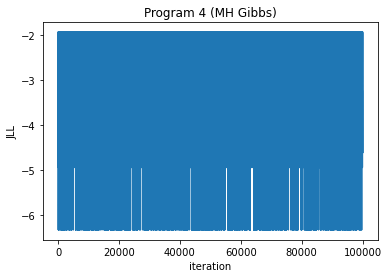

In [9]:
plt.plot(jlls)
plt.title("Program 4 (MH Gibbs)")
plt.xlabel("iteration")
plt.ylabel("JLL")